In [1]:
# download example data
from downloaddata import download_example_data
download_example_data()

## WholeSlideAnnotation

In [2]:
from wholeslidedata.annotation.wholeslideannotation import WholeSlideAnnotation
from wholeslidedata.annotation.utils import plot_annotations
from matplotlib import pyplot as plt
from pprint import pprint
from wholeslidedata.annotation import utils as annotation_utils

path_to_wsa = "/tmp/TCGA-21-5784-01Z-00-DX1.xml"

In [3]:
wsa = WholeSlideAnnotation(path_to_wsa, labels=['lymphocytes', 'stroma', 'tumor'])

print(f'\nlabel_map: {wsa.labels.map}')
print(f'\ncounts per label:  {annotation_utils.get_counts_in_annotations(wsa.annotations, wsa.labels)}')
print(f'\npixels per label:  {annotation_utils.get_pixels_in_annotations(wsa.annotations, wsa.labels)}')


label_map: {'lymphocytes': 1, 'stroma': 2, 'tumor': 3}

counts per label:  {'lymphocytes': 3, 'stroma': 2, 'tumor': 5}

pixels per label:  {'lymphocytes': 557574, 'stroma': 155315, 'tumor': 1303960}


## Annotations

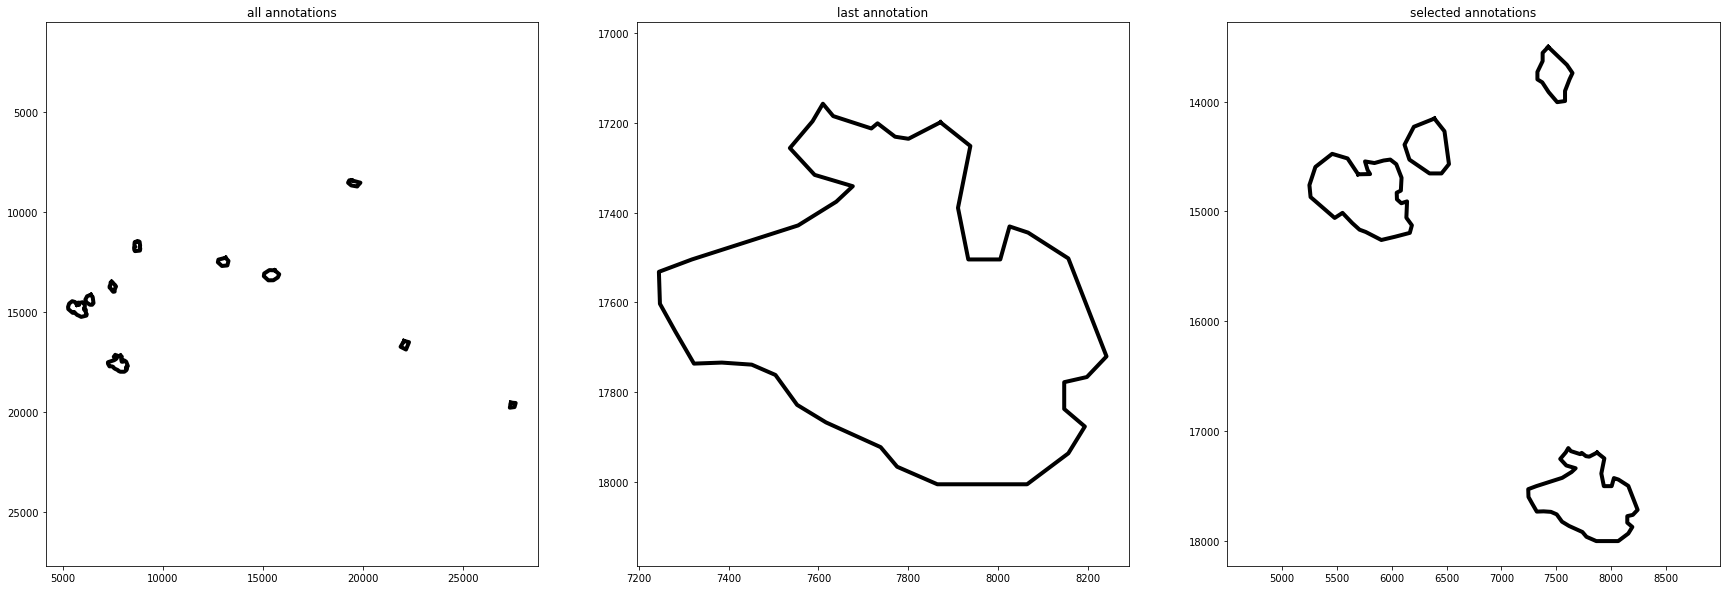

In [4]:
wsa = WholeSlideAnnotation(path_to_wsa, labels=['lymphocytes', 'stroma', 'tumor'])

"""
After creating a whole slide annotation, we can plot all the annotation within itL
"""

fig, axes = plt.subplots(1,3, figsize=(30,10))
annotations = wsa.annotations
plot_annotations(annotations, axes[0], title='all annotations')


"""
We can also plot a specific annotattion for example the last annotation
"""

annotations = wsa.annotations
annotation = annotations[-1]
plot_annotations([annotation], axes[1], title='last annotation')


"""
Furthemore we can select all annotations in a specific region based on a center coordinate, a width and a heigth. 
"""

center = wsa.annotations[-1].center
width, height = 10000, 10000

selected_annotations = wsa.select_annotations(*center, width, height)

plot_annotations(selected_annotations, axes[2], title='selected annotations')
plt.show()